<a href="https://colab.research.google.com/github/harakenken22/diveintocode-ml/blob/master/week5_lec_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


【問題1】クロスバリデーション
----
>事前学習期間では検証データをはじめに分割しておき、それに対して指標値を計算することで検証を行っていました。（ホールドアウト法）しかし、分割の仕方により精度は変化します。実践的には クロスバリデーション（交差検証） を行います。分割を複数回行い、それぞれに対して学習と検証を行う方法です。複数回の分割のためにscikit-learnにはKFoldクラスが用意されています。
事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行してください。

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
%matplotlib inline

#application_train.csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/application_train.csv')
df = df.head(10000)

feature = ['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY']

X = df[feature]
y = df['TARGET']

print('X.shape:\n',X.shape,'\nx:\n',X.head())
print('y.shape:\n',y.shape,'\ny:\n',y.head())

X = X.values
y = y.values

X.shape:
 (10000, 2) 
x:
    DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY
0       -9461                            2
1      -16765                            1
2      -19046                            2
3      -19005                            2
4      -19932                            2
y.shape:
 (10000,) 
y:
 0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64


交差検証（Cross-validation）
----

In [18]:
#交差検証(クロスバリデーション)
kf = KFold(n_splits = 5, shuffle = True)
count = 0

#回帰ベースラインモデル
clf = RandomForestClassifier(max_depth=2, random_state=0)

#評価R2
evaluation = []

#標準化
scaler = StandardScaler()
scaler.fit_transform(X)


#標準化した値をトレーニングとテストデータを分ける
train_index_list = []
test_index_list = []
for train_index, valid_index in kf.split(df):
    count+= 1
    train_index_list.append(train_index)
    test_index_list.append(test_index)

    X_train, X_vaild = X[train_index], X[valid_index]
    y_train, y_vaild = y[train_index], y[valid_index]
    print(y_train, y_vaild)

    #Flattenと行う平坦化
    y_train = y_train.ravel()
    y_vaild = y_vaild.ravel()

    #トラインデータでモデル作成
    clf.fit(X_train, y_train)

    #検証データに対して予測
    y_pred = clf.predict_proba(X_vaild)[:,1]

    #評価
    score = roc_auc_score(y_vaild, y_pred)
    print('AUC:', score)
    evaluation.append(score)

print('Mean:{:.3f}'.format(np.mean(evaluation)))


[1 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]
AUC: 0.6378998492114943
[1 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]
AUC: 0.5953229854075658
[1 0 0 ... 0 0 0] [0 0 0 ... 1 0 0]
AUC: 0.6414123974050308
[1 0 0 ... 0 0 0] [0 0 1 ... 0 0 0]
AUC: 0.5968271981464406
[0 0 0 ... 0 0 0] [1 0 0 ... 0 0 0]
AUC: 0.6163125800779027
Mean:0.618


他の方法：交差検証（Cross-validation）
----
値をそのままクロスバリデーションして、データ分析を行う。
ロジスティック回帰分析によるクロスバリデーションを行っている。

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# 交差検証
scores = cross_val_score(logreg, df.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT']], df['TARGET'])
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.9225 0.9225 0.9225 0.9225 0.9225]
Average score: 0.9225


クロスバリデーションを行っていない通常のスプリット：
----

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT']], df['TARGET'], test_size=0.8, random_state=0)
print(X_train, X_test)
print(y_train, y_test)

      AMT_INCOME_TOTAL  AMT_CREDIT
3477           67500.0    286704.0
9567          108000.0    675000.0
8284          202500.0    657702.0
3129          225000.0    817560.0
8427          103500.0    272520.0
...                ...         ...
9225          193500.0   1971072.0
4859          472500.0   1575000.0
3264           67500.0    327024.0
9845           49500.0    168147.0
2732          103500.0    540000.0

[2000 rows x 2 columns]       AMT_INCOME_TOTAL  AMT_CREDIT
9394          135000.0    341280.0
898            67500.0     90000.0
2398          135000.0    253377.0
5906           81000.0    247500.0
2343          270000.0    932427.0
...                ...         ...
8673          202500.0   1301283.0
8175          216000.0    178290.0
4933          157500.0    673848.0
504           270000.0    835380.0
107           135000.0    180000.0

[8000 rows x 2 columns]
3477    0
9567    0
8284    0
3129    0
8427    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    0


【問題2】グリッドサーチ
これまで分類器のパラメータには触れず、デフォルトの設定を使用していました。
パラメータの詳細は今後のSprintで学んでいくことになります。
機械学習の前提として、パラメータは状況に応じて最適なものを選ぶ必要があります。
最適なパラメータを探していくことをパラメータチューニングと呼びます。
パラメータチューニングをある程度自動化する単純な方法としてはグリッドサーチがあります。

scikit-learnのGridSearchCVを使い、グリッドサーチを行うコードを作成してください。
そして、ベースラインモデルに対して何らかしらのパラメータチューニングを行なってください。
どのパラメータをチューニングするかは、使用した手法の公式ドキュメントを参考にしてください。

sklearn.model_selection.GridSearchCV — scikit-learn 0.21.3 documentation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

GridSearchCVクラスには引数としてモデル、探索範囲、さらにクロスバリデーションを何分割で行うかを与えます。クロスバリデーションの機能も含まれているため、これを使用する場合はKFoldクラスを利用する必要はありません。

In [19]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [21]:
#ベースラインモデル
model = RandomForestClassifier()

#グリッドサーチ
parameters = {'max_depth': [2, 3, 4]}

clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc')
clf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [22]:
#グリッドサーチを行ったあとの結果
cv_result = pd.DataFrame(clf.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.270794,0.004546,0.020247,0.002747,2,{'max_depth': 2},0.616886,0.558009,0.628109,0.635767,0.637661,0.615286,0.029556,2
1,0.307871,0.008873,0.021190,0.001784,3,{'max_depth': 3},0.619068,0.543841,0.635727,0.637080,0.642689,0.615681,0.036774,1
2,0.359535,0.008370,0.022394,0.001580,4,{'max_depth': 4},0.620161,0.538007,0.634176,0.638706,0.628954,0.612001,0.037507,3


In [23]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

【その他別のものをもちたグリッドサーチ】
---

GridSearchCVを用いてパラメーターの値を明確にする
---
参考URL:
https://qiita.com/yhyhyhjp/items/c81f7cea72a44a7bfd3a

>.grid_scores_は古くなっていたため、使用することができず、.cv_results_を使用した。

In [ ]:
#パラメーターの調整
tuned_parameters = [
    {"C":[0.01, 0.1, 1.0, 5, 10]},
    {"C":[0.01, 0.1, 1.0, 5, 10], "penalty":["l2"]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.005]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.005]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.005]}
    ]

score = 'f1'
clf = GridSearchCV(LogisticRegression(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=10, # 交差検定の回数
    scoring='%s_weighted' % score )

clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)

print(y_test)
print(Y_pred)

print('MESは{}'.format(mean_squared_error(y_test, Y_pred)))
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, Y_pred)))

9394    0
898     0
2398    0
5906    0
2343    0
       ..
8673    0
8175    0
4933    0
504     0
107     0
Name: TARGET, Length: 8000, dtype: int64
[0 0 0 ... 0 0 0]
MESは0.0785
Accuracy: 0.9215


ROCを描画:
---

In [ ]:
y_test_ndarry = np.array(y_test)
print(y_test_ndarry)

[0 0 0 ... 0 0 0]


偽陽性率:[0. 1.]
真陽性率:[0. 1.]
閾値:[1 0]


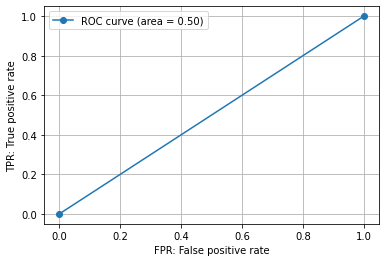

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_ndarry, Y_pred, drop_intermediate=False)
print('偽陽性率:{}'.format(fpr)) #偽陽性率
print('真陽性率:{}'.format(tpr)) #真陽性率
print('閾値:{}'.format(thresholds)) #閾値
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc, marker='o')
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

In [ ]:
#各試行でのスコアを確認できる
# clf.grid_scores_
clf.cv_results_

{'mean_fit_time': array([0.00845938, 0.00763795, 0.0093148 , 0.00775545, 0.00795493,
        0.0078213 , 0.00803432, 0.007901  , 0.00925994, 0.00802517]),
 'mean_score_time': array([0.00191824, 0.00165551, 0.00171707, 0.00175974, 0.00168326,
        0.00175264, 0.0018714 , 0.00177121, 0.00181401, 0.00170817]),
 'mean_test_score': array([0.89115356, 0.89115356, 0.89115356, 0.89115356, 0.89115356,
        0.89115356, 0.89115356, 0.89115356, 0.89115356, 0.89115356]),
 'param_C': masked_array(data=[0.01, 0.1, 1.0, 5, 10, 0.01, 0.1, 1.0, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=[--, --, --, --, --, 'l2', 'l2', 'l2', 'l2', 'l2'],
              mask=[ True,  True,  True,  True,  True, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01},
  {'C': 0.1},


In [ ]:
#最適化したパラメータを確認できる
# clf.best_params_
best = clf.best_params_
print('もっとも良い値は{}'.format(best))

もっとも良い値は{'C': 0.01}


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# grid={"C":[0.01, 0.1, 1.0, 5, 10], "penalty":["l1","l2"]}# l1 lasso l2 ridge
# logreg=LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=10)
# logreg_cv.fit(x_train,y_train)

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

【問題3】Kaggle Notebooksからの調査
---
KaggleのNotebooksから様々なアイデアを見つけ出して、列挙してください。

クロスバリデーションの実施についての記述：
https://www.kaggle.com/ynouri/random-forest-k-fold-cross-validation

下記のような方法をもちいてグリットサーチを行う。

- 数値以外のデータを数値データにエンコードする（採用）
- 欠損値データを補完する（採用）
- 異常値データを修正する（採用）
- 新たに特徴量を作成する（採用）
- ビニングで特徴量を作成する
- 特徴量を選別する（例えば、相関が高い2つの特徴量を1つだけにする）（採用）
- 他のcsvファイルから、関連性のある特徴量を作成する

```
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
````


グリッドリサーチに関する記述：
https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search

【問題4】高い汎化性能のモデル作成
---
問題3で見つけたアイデアと、独自のアイデアを組み合わせ高い汎化性能のモデル作りを進めてください。
その過程として、何を行うことで、クロスバリデーションの結果がどの程度変化したかを表にまとめてください。

In [25]:
# トレインデータの読み込み
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/application_train.csv')
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# テストデータの読み込み
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/application_test.csv')
print('Training data shape: ', test.shape)
test.head()

Training data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# オブジェクトデータの確認
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [29]:
# カテゴリデータをエンコード
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [30]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CODE_GENDER                    3
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [31]:
# one-hot エンコード
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [32]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [33]:
# トレインデータの変数量をテストデータに合わせて整形
train_labels = train['TARGET']
train, test = train.align(test, join = 'inner', axis = 1)

train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [34]:
# 数値の修正
train['DAYS_BIRTH'] = (train['DAYS_BIRTH']/-365)
train['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [35]:
test['DAYS_BIRTH'] = (test['DAYS_BIRTH']/-365)
test['DAYS_BIRTH'].describe()

count    48744.000000
mean        44.022150
std         11.851782
min         20.104110
25%         34.235616
50%         43.246575
75%         53.800000
max         69.027397
Name: DAYS_BIRTH, dtype: float64

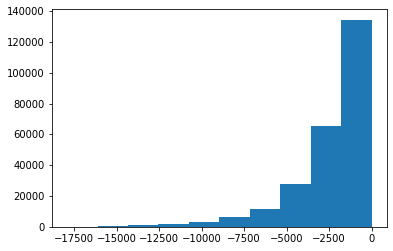

In [36]:
# トレイン異常値の修正
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
plt.hist(train['DAYS_EMPLOYED']);

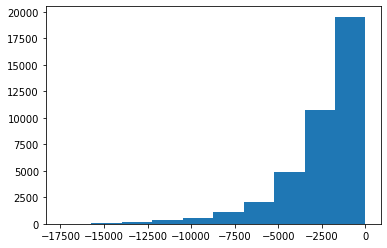

In [37]:
# テスト異常値の修正
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
plt.hist(test['DAYS_EMPLOYED']);

In [38]:
# 欠損値を確認
data = train

missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_df = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_df))

欠損値を含む列数: 62


In [39]:
# 欠損値を補完
mean = train.mean()

train_fill_mean = train.fillna(mean)

In [40]:
# 欠損値を確認
data = train_fill_mean

missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_df = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_df))

欠損値を含む列数: 0


前処理(標準化)
---

In [41]:
# 特徴量の選択（TARGET以外使用）
feature = []
for i in train_fill_mean:
    if i not in 'TARGET':
        feature.append(i)
print('特徴量数:',len(feature))

特徴量数: 239


In [42]:
X = train_fill_mean[feature].values
y = train_fill_mean['TARGET'].values

In [43]:
# 標準化
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.73342255, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962],
       [-1.73341283, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962],
       [-1.7334031 ,  3.08265852,  1.39292539, ..., -0.13321491,
        -1.03759936, -0.08733962],
       ...,
       [ 1.73239096, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962],
       [ 1.73240069, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962],
       [ 1.73241042, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962]])

In [44]:
#シェイプの確認
print('shape: ', X.shape)

shape:  (307511, 239)


パラメーターチューニング
----

In [45]:
# ベースラインモデル
model = RandomForestClassifier()

# グリッドサーチ
parameters = {'criterion': ["gini", "entropy"],
              'max_depth': [1, 2, 3, 4, 5],
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc')
clf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [46]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.924409,0.163793,0.514891,0.034539,gini,1,0,"{'criterion': 'gini', 'max_depth': 1, 'random_...",0.700583,0.707369,0.702116,0.702157,0.707514,0.703948,0.002909,9
1,17.814275,0.160754,0.609693,0.016054,gini,2,0,"{'criterion': 'gini', 'max_depth': 2, 'random_...",0.710340,0.716368,0.709057,0.710820,0.714856,0.712288,0.002815,8
2,25.145839,0.230573,0.740526,0.013573,gini,3,0,"{'criterion': 'gini', 'max_depth': 3, 'random_...",0.714917,0.720135,0.713571,0.715798,0.719821,0.716849,0.002654,5
3,31.508372,0.242835,0.814480,0.008664,gini,4,0,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.717531,0.721869,0.715649,0.718247,0.722258,0.719111,0.002559,4
4,38.039256,0.193705,0.885008,0.010115,gini,5,0,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.722615,0.727008,0.718880,0.720916,0.723135,0.722511,0.002697,1
5,11.432127,0.275189,0.503347,0.006525,entropy,1,0,"{'criterion': 'entropy', 'max_depth': 1, 'rand...",0.700043,0.706448,0.699643,0.701679,0.708195,0.703202,0.003477,10
6,18.699827,0.153361,0.617641,0.011149,entropy,2,0,"{'criterion': 'entropy', 'max_depth': 2, 'rand...",0.709943,0.714934,0.708039,0.712135,0.717520,0.712514,0.003397,7
7,26.578725,0.060108,0.741548,0.009477,entropy,3,0,"{'criterion': 'entropy', 'max_depth': 3, 'rand...",0.714025,0.717678,0.709965,0.714117,0.717357,0.714628,0.002797,6
8,33.713794,0.126012,0.816979,0.011254,entropy,4,0,"{'criterion': 'entropy', 'max_depth': 4, 'rand...",0.718302,0.721616,0.713822,0.718988,0.724585,0.719463,0.003585,3
9,41.687048,0.538982,0.884570,0.009774,entropy,5,0,"{'criterion': 'entropy', 'max_depth': 5, 'rand...",0.722498,0.723369,0.716591,0.721122,0.726277,0.721972,0.003176,2


考察１
---
前処理を行った訓練データに対して、ランダムフォレストでの学習、推定を行なった。
主なモデルパラメータとして、criterion, max_depth。

木の深さは、深ければ深いほど精度は上がるが時間がかかる。
（サーチするパラメータとして、選ぶ必要がなかったようだ。）

クライテリアでは、若干ジニのほうが精度が上がりそう。

In [47]:
# ベースラインモデル
model = RandomForestClassifier()

# グリッドサーチ
parameters = {'n_estimators': [100,200,300],
              'min_samples_leaf': [5,10,15],
              'min_samples_split': [1,2,5],
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc')
clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.439849,0.033489,0.000000,0.000000,5,1,100,0,"{'min_samples_leaf': 5, 'min_samples_split': 1...",NaN,NaN,NaN,NaN,NaN,27
1,0.454131,0.005267,0.000000,0.000000,5,1,200,0,"{'min_samples_leaf': 5, 'min_samples_split': 1...",NaN,NaN,NaN,NaN,NaN,25
2,0.499261,0.004578,0.000000,0.000000,5,1,300,0,"{'min_samples_leaf': 5, 'min_samples_split': 1...",NaN,NaN,NaN,NaN,NaN,24
3,91.032306,2.093247,3.283860,0.252129,5,2,100,0,"{'min_samples_leaf': 5, 'min_samples_split': 2...",0.699977,0.728925,0.730487,0.719796,0.014029,17
4,180.946339,1.288309,6.460818,0.550891,5,2,200,0,"{'min_samples_leaf': 5, 'min_samples_split': 2...",0.709532,0.733186,0.734033,0.725584,0.011355,13
5,266.966509,2.809942,9.545550,0.728506,5,2,300,0,"{'min_samples_leaf': 5, 'min_samples_split': 2...",0.715382,0.734769,0.735759,0.728636,0.009381,11
6,88.911725,0.251573,3.244470,0.239623,5,5,100,0,"{'min_samples_leaf': 5, 'min_samples_split': 5...",0.699977,0.728925,0.730487,0.719796,0.014029,17
7,178.696842,1.469992,6.393545,0.535584,5,5,200,0,"{'min_samples_leaf': 5, 'min_samples_split': 5...",0.709532,0.733186,0.734033,0.725584,0.011355,13
8,266.328861,1.180057,9.560209,0.773422,5,5,300,0,"{'min_samples_leaf': 5, 'min_samples_split': 5...",0.715382,0.734769,0.735759,0.728636,0.009381,11
9,0.413706,0.008481,0.000000,0.000000,10,1,100,0,"{'min_samples_leaf': 10, 'min_samples_split': ...",NaN,NaN,NaN,NaN,NaN,20


【問題5】最終的なモデルの選定
---
最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。
どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

提出時の主な前処理など、

- エンコード・・・カテゴリデータをラベルエンコード、ワンホットエンコード併用して数値化
- 欠損値・・・処理しない
- 異常値・・・'DAYS_EMPLOYED'=365243をNaNに修正
- スケーリング・・・しない
- 特徴量・・・ノートブックを参考に4つ追加

In [49]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25.920548,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45.931507,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,52.180822,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,52.068493,-3039.0,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,54.608219,-3038.0,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,52.715068,-2329.0,-5170.0,-812,NaN,1,1,0,1,0,1,2.0,2,2,18,0,0,0,0,0,0,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,49.490411,-4469.0,-9118.0,-1623,NaN,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,54.898630,-4458.0,-2175.0,-3503,5.0,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,38.290411,-1866.0,-2000.0,-4208,NaN,1,1,0,1,1,0,4.0,2,2,11,0,0,0,0,0,0,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,35.726027,-2191.0,-4000.0,-4262,16.0,1,1,1,1,0,0,3.0,2,2,5,0,0,0,0,1,1,0.202145,0.425687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# 既存の説明変数を使用して、新たに特徴量を作成する。
train['CREDIT_INCOME_PERCENT'] = \
train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']

train['ANNUITY_INCOME_PERCENT'] = \
train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']

train['CREDIT_TERM'] = \
train['AMT_ANNUITY'] / train['AMT_CREDIT']

train['DAYS_EMPLOYED_PERCENT'] = \
train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']

In [52]:
test['CREDIT_INCOME_PERCENT'] = \
test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']

test['ANNUITY_INCOME_PERCENT'] = \
test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']

test['CREDIT_TERM'] = \
test['AMT_ANNUITY'] / test['AMT_CREDIT']

test['DAYS_EMPLOYED_PERCENT'] = \
test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']

In [53]:
feature = []
for i in train:
    if i not in ['SK_ID_CURR','TARGET']:
        feature.append(i)
print('特徴量数:',len(feature))

特徴量数: 242


In [54]:
X = train[feature].values
y = train['TARGET'].values
X_test = test[feature].values

In [55]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=100,random_state = 0)
clf.fit(X, y)
y_pred = clf.predict_proba(X_test)[:,1]

In [56]:
# Submission dataframe
submit = pd.DataFrame(test['SK_ID_CURR'])
submit['TARGET'] = y_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.035538
1,100005,0.098254
2,100013,0.017381
3,100028,0.044205
4,100038,0.145581


In [58]:
# Save the submission dataframe
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/submission.csv',
              index = False)

提出結果
---
Private Score 0.759
Public Score 0.760
提出は、検証5のLightGBMを使用した。 ベースラインのCVスコア0.60に対して、0.76（26%）の向上が見られた。
また、提出前のトレインデータでの検証結果（CVスコア）も0.763だったので、モデルの汎用性も良いと考える。

反省点として、LightGBMのパラメータチューニングに時間をさけなかったため、ベースライン作成時から使用したら良かった。